In [2]:
import numpy as np
import tensorflow as tf
import json
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
import gc
from tensorflow.keras.backend import clear_session

In [3]:
# Load keypoints data
with open("keypoints (1).json", "r") as file:
    keypoint_data = json.load(file)

In [4]:
# Prepare feature matrix and labels
X = []  # Features
y = []  # Labels

In [5]:
for class_name, samples in keypoint_data.items():
    for sample in samples:
        X.append(sample["keypoints"])
        y.append(class_name)

In [6]:

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [8]:
# Convert to numpy arrays
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)


In [9]:
import tensorflow as tf

# Load your trained model
trained_model = tf.keras.models.load_model("best_pose_detection_model.h5")

trained_model.summary()

2024-12-15 11:24:54.817014: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 82)             │        10,578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,380 (91.33 KB)

 Trainable params: 23,378 (91.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [10]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("best_pose_detection_model.h5")


In [11]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.8244
Test Accuracy: 81.36%


In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Print a classification report
print(classification_report(y_test, y_pred_classes))

# Print a confusion matrix
print(confusion_matrix(y_test, y_pred_classes))


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.88      0.54      0.67        13
           2       0.87      0.92      0.89        60
           3       0.64      0.71      0.67        42
           4       0.76      0.94      0.84        33
           5       0.94      0.71      0.81        41
           6       0.88      0.94      0.91        48
           7       0.91      0.93      0.92        69
           8       0.93      0.76      0.84        51
           9       0.81      0.80      0.80        44
          10       0.82      0.89      0.85       123
          11       0.55      0.67      0.60        24
          12       0.78      0.93      0.85        46
          13       0.71      0.73      0.72        49
          14       0.72      0.94      0.81        49
          15       0.83      0.62      0.71         8
          16       0.67      0.60      0.6

In [20]:
import matplotlib.pyplot as plt

# Assuming X_test is a numpy array of shape (num_samples, height * width)
# Reshape the image data to the correct shape (height, width) for grayscale or (height, width, channels) for RGB

# Example for grayscale images
height, width = 28, 28  # Adjust dimensions as needed
for i in range(5):  # Display 5 samples
    sample_image = X_test[i].reshape(height, width)
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    plt.axis("off")
    plt.show()

# Example for RGB images
height, width, channels = 28, 28, 3  # Adjust dimensions as needed
for i in range(5):  # Display 5 samples
    sample_image = X_test[i].reshape(height, width, channels)
    plt.imshow(sample_image)
    plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    plt.axis("off")
    plt.show()

ValueError: cannot reshape array of size 99 into shape (28,28)

In [14]:
print("Shape of X_test:", X_test.shape)


Shape of X_test: (3068, 99)


In [15]:
for i in range(5):  # Display 5 samples
    print(f"Sample {i+1}:")
    print(f"True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")


Sample 1:
True Label: 71, Predicted Label: 71
Sample 2:
True Label: 21, Predicted Label: 22
Sample 3:
True Label: 34, Predicted Label: 34
Sample 4:
True Label: 11, Predicted Label: 11
Sample 5:
True Label: 5, Predicted Label: 64


In [16]:
for i in range(5):  # Display 5 samples
    sample_image = X_test[i].reshape(height, width, channels)  # Adjust shape as needed
    plt.imshow(sample_image, cmap='gray')  # Use 'gray' for grayscale, remove cmap for RGB
    plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
    plt.axis("off")
    plt.show()


NameError: name 'height' is not defined

In [17]:
sample_image = X_test[i].reshape(28, 28)  # Adjust dimensions as needed
plt.imshow(sample_image, cmap='gray')
plt.title(f"True: {y_test[i]}, Pred: {y_pred_classes[i]}")
plt.axis("off")
plt.show()


ValueError: cannot reshape array of size 99 into shape (28,28)

In [18]:
for i in range(5):  # Display 5 samples
    print(f"Sample {i+1}: True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")


Sample 1: True Label: 71, Predicted Label: 71
Sample 2: True Label: 21, Predicted Label: 22
Sample 3: True Label: 34, Predicted Label: 34
Sample 4: True Label: 11, Predicted Label: 11
Sample 5: True Label: 5, Predicted Label: 64


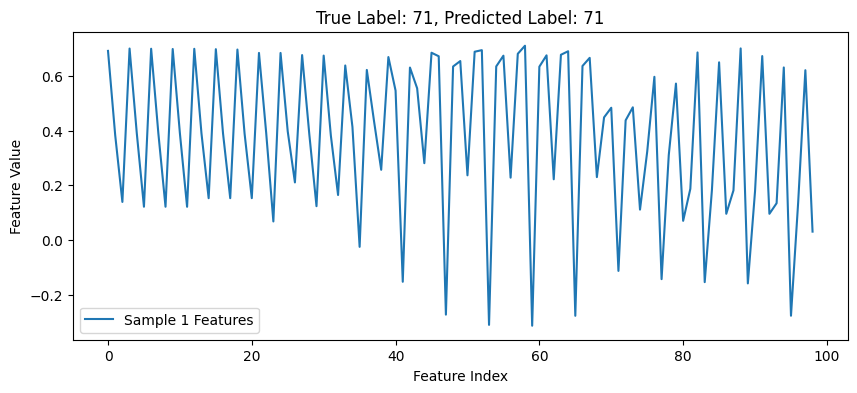

<Figure size 640x480 with 0 Axes>

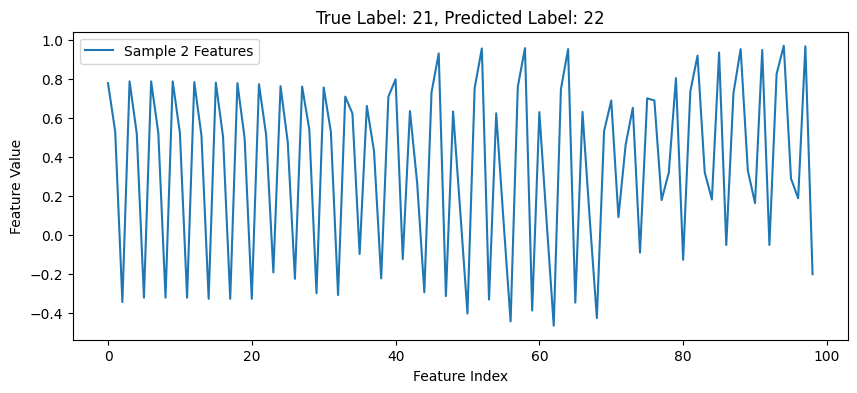

<Figure size 640x480 with 0 Axes>

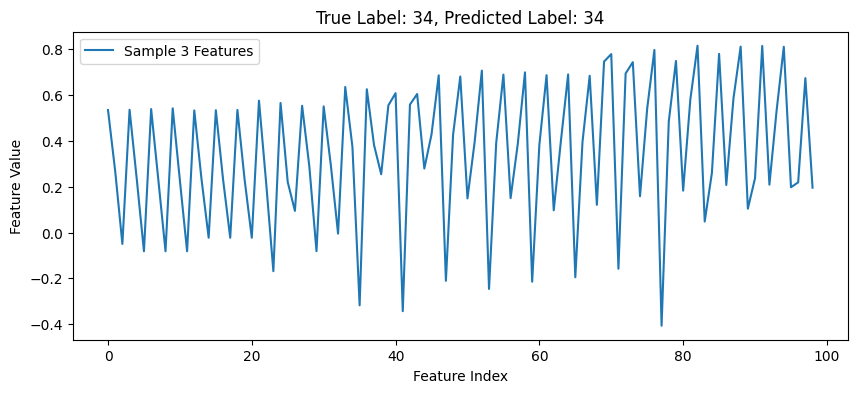

<Figure size 640x480 with 0 Axes>

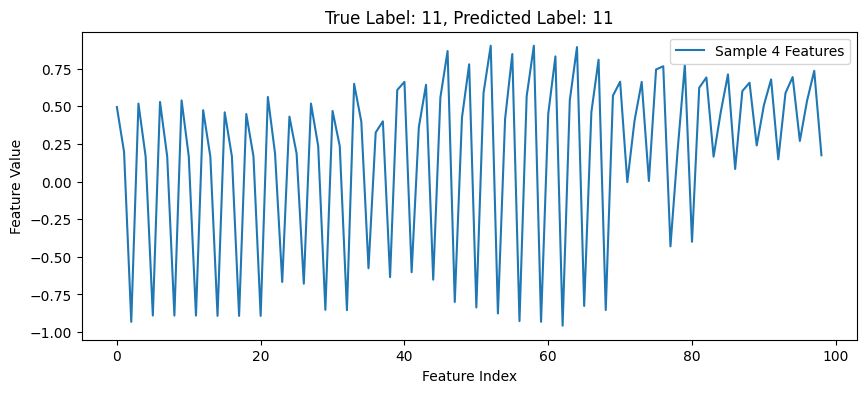

<Figure size 640x480 with 0 Axes>

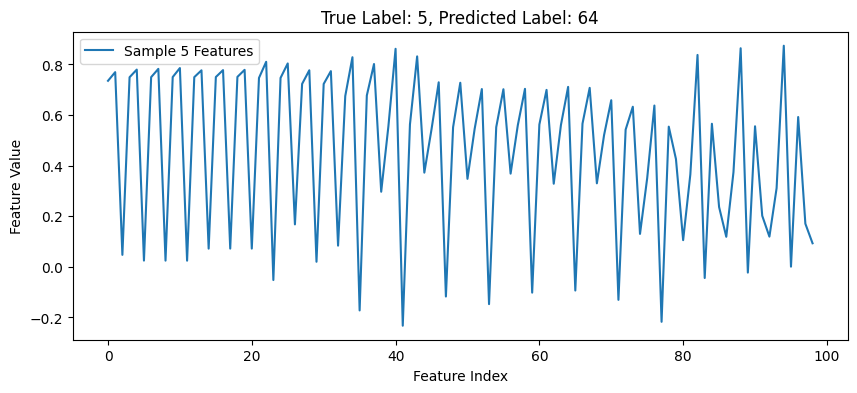

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):  # Display 5 samples
    plt.figure(figsize=(10, 4))
    plt.plot(X_test[i], label=f"Sample {i+1} Features")
    plt.title(f"True Label: {y_test[i]}, Predicted Label: {y_pred_classes[i]}")
    plt.xlabel("Feature Index")
    plt.ylabel("Feature Value")
    plt.legend()
    plt.show()
plt.savefig('plot.png')  # Save the plot to a file


In [23]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred_classes))


Model Accuracy: 81.36%
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.88      0.54      0.67        13
           2       0.87      0.92      0.89        60
           3       0.64      0.71      0.67        42
           4       0.76      0.94      0.84        33
           5       0.94      0.71      0.81        41
           6       0.88      0.94      0.91        48
           7       0.91      0.93      0.92        69
           8       0.93      0.76      0.84        51
           9       0.81      0.80      0.80        44
          10       0.82      0.89      0.85       123
          11       0.55      0.67      0.60        24
          12       0.78      0.93      0.85        46
          13       0.71      0.73      0.72        49
          14       0.72      0.94      0.81        49
          15       0.83      0.62      0.71         8
          16       0.67      0.60      0.63        10
    

In [24]:
misclassified = [(i, y_test[i], y_pred_classes[i]) for i in range(len(y_test)) if y_test[i] != y_pred_classes[i]]
print(f"Number of misclassified samples: {len(misclassified)}")
for index, true, pred in misclassified[:5]:  # Display first 5 misclassified samples
    print(f"Sample {index}: True Label: {true}, Predicted Label: {pred}")


Number of misclassified samples: 572
Sample 1: True Label: 21, Predicted Label: 22
Sample 4: True Label: 5, Predicted Label: 64
Sample 5: True Label: 75, Predicted Label: 40
Sample 9: True Label: 78, Predicted Label: 45
Sample 17: True Label: 3, Predicted Label: 11


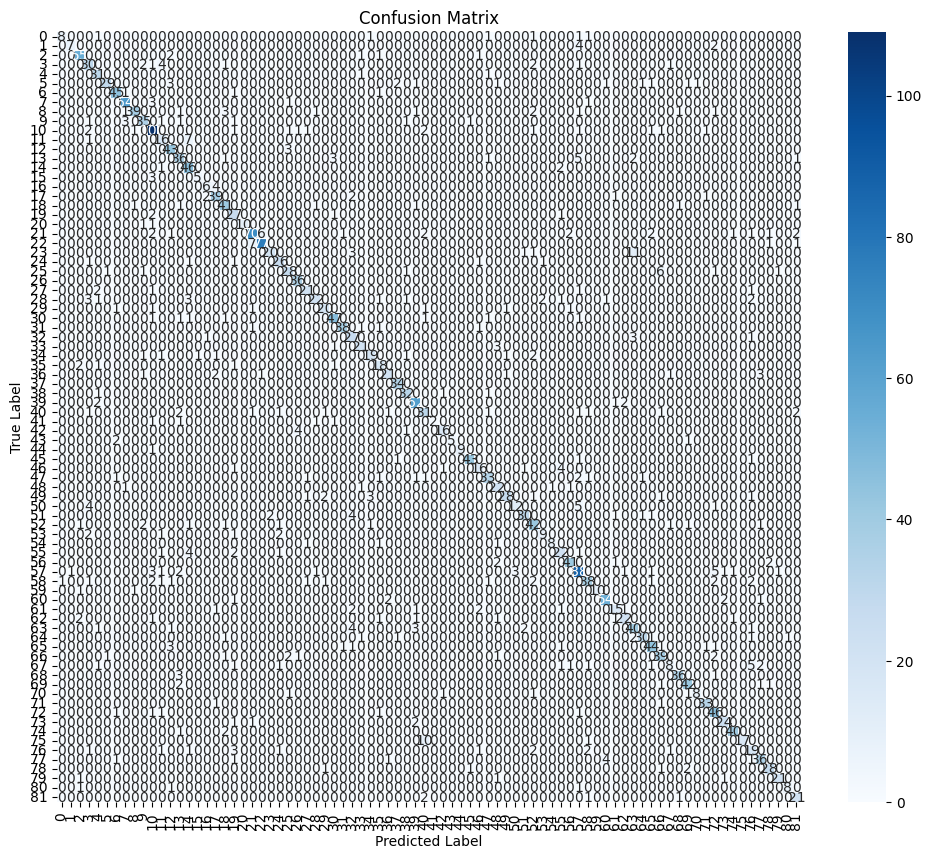

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(82), yticklabels=range(82))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


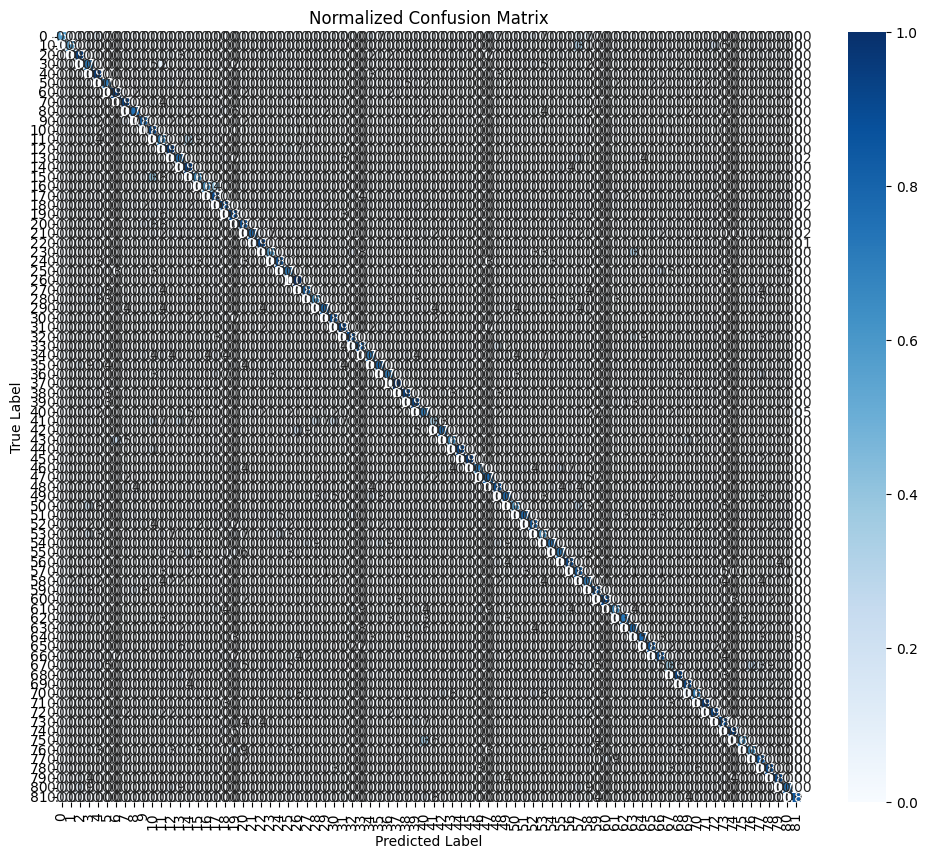

In [26]:
import numpy as np

# Normalize confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(82), yticklabels=range(82))
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Top Misclassifications:
    True Label  Predicted Label  Count
0          23               63     11
1          75               40     10
2          11               14      7
3          22               21      7
4          21               22      6
5          25               66      6
6          13               57      5
7          50               57      5
8          57               72      5
9          67               76      5

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.89      0.57      0.70        14
     Class 1       0.88      0.54      0.67        13
     Class 2       0.87      0.92      0.89        60
     Class 3       0.64      0.71      0.67        42
     Class 4       0.76      0.94      0.84        33
     Class 5       0.94      0.71      0.81        41
     Class 6       0.88      0.94      0.91        48
     Class 7       0.91      0.93      0.92        69
     Class 8       0.93      0.76      0.84  

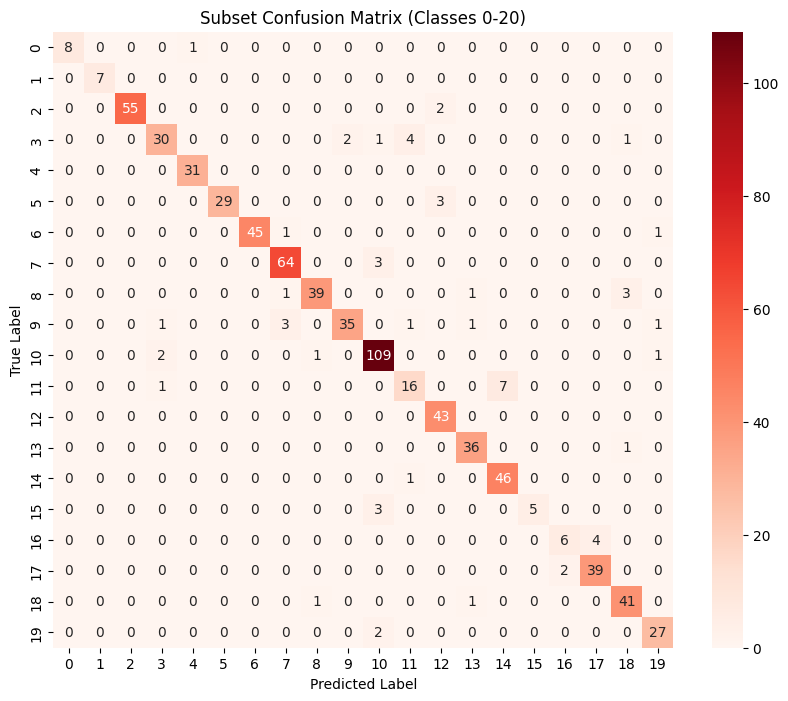

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Compute normalized confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Identify top misclassifications
misclassifications = [
    (i, j, conf_matrix[i, j])
    for i in range(conf_matrix.shape[0])
    for j in range(conf_matrix.shape[1]) if i != j and conf_matrix[i, j] > 0
]
misclassifications = sorted(misclassifications, key=lambda x: x[2], reverse=True)

# Display top misclassifications
top_misclassifications = pd.DataFrame(
    misclassifications[:10],
    columns=["True Label", "Predicted Label", "Count"]
)
print("Top Misclassifications:\n", top_misclassifications)

# Class-level precision, recall, F1-score
print("\nClassification Report:\n")
class_report = classification_report(y_test, y_pred_classes, target_names=[f"Class {i}" for i in range(82)])
print(class_report)

# Focus on specific range of classes (e.g., class 0 to 20)
subset_classes = range(20)
subset_matrix = conf_matrix[np.ix_(subset_classes, subset_classes)]

# Visualize subset of confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    subset_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=subset_classes, yticklabels=subset_classes
)
plt.title("Subset Confusion Matrix (Classes 0-20)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [29]:
import h5py

# Open the model file
with h5py.File('/home/hghosh/Desktop/CODING/Python/Internship/flask/models/best_pose_detection_model.h5', 'r') as f:
    if 'class_indices' in f.attrs:
        pose_list = f.attrs['class_indices']
        print(pose_list)
    else:
        print("No class metadata found in the model.")


No class metadata found in the model.
